<a href="https://colab.research.google.com/github/Pikarz/tirocinio_infostud/blob/main/mscred_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 26/06/23
Grazie all'aiuto del gentilissimo Edoardo ho chiarito alcuni dubbi. Purtroppo non sembra possibile far girare TF 1.15.5 su Colab attualmente, quindi sono costretto a utilizzare un environment locale. Il training è molto pesante computazionalmente; non posso fare molte iterazioni.
Quest'oggi sono riuscito a far girare MSCRED con i dati generati dal data generator di Dimitri Belli.

#Setup


Variables initialization

In [ ]:
csv_name = 'synth_train.csv'

input_data_path = './input_data/'

raw_data_path = input_data_path+csv_name # input csv

mscred_output_path = './mscred_output/'

#Data generator

13
18141
13
13374
22
15559
16
16309
19
18462


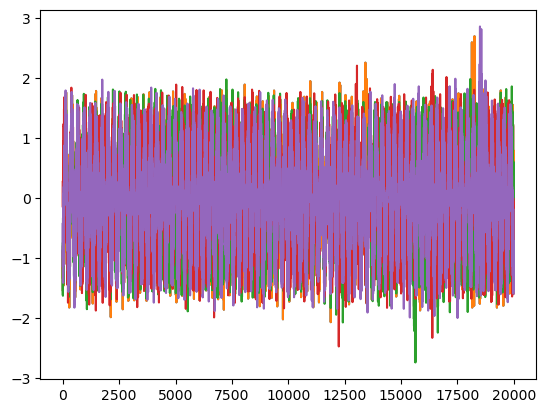

In [ ]:
'''
    Created on March 4, 2022
    Modified on April 13, 2022

    @author: Dimitri Belli
    @info:   Python class for the generation of MVTS synthetic datasets

    @add:    - class-like structure
             - anomaly generation procedure
             - comments

'''


# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class synthetic_MVTS_dataset_generator:

    def __init__(self, features=30, seq_len=20000, anomaly=False, n_anomalies=0, anomaly_duration=[30,90]):
        '''
            default values:
                features         :=     30
                seq_len          :=  20000
                anomaly          :=  False
                n_anomalies      :=      0
                anomaly_duration := [30,90]
        '''
        self.features = features
        self.seq_len = seq_len
        self.anomaly = anomaly
        self.n_anomalies = n_anomalies
        self.anomaly_duration = anomaly_duration

    def generate_harmonics(self, omega, t0, lmbda=0.3):
        '''
            a way to generate harmonic series

            :omega : frequency
            :t0    : (int)  from “discrete uniform” distribution
            :lmbda : (double) scale factor (default 0.3)

            :return: (numpy array) bounded time series
        '''

        # randomly choice the parameters and generate an harmonic time series
        t = np.arange(self.seq_len)
        eps = np.random.normal(loc=0, scale=1, size=self.seq_len)
        alpha = np.random.randint(0,2)

        time_series = (1 - alpha) * np.sin((t - t0) / omega) + alpha * np.cos((t - t0) / omega) + eps * lmbda

        # reshape and return the time series
        return time_series.reshape(-1,1)

    def generate_anomaly(self, data, s_index,  duration, series_num):
        '''
            :data       : (numpy arrays) the dataset
            :s_index    : (int) the position within the time series where the anomaly starts
            :dur        : (int) the duration of the anomaly
            :series_num : (int) the feature to which introduce the anomaly
        '''
        base_value = data[s_index, series_num]
        data[s_index : s_index + duration, series_num] = base_value + np.random.normal(loc=0, scale=0.8, size=duration)

    def generate_dataset(self):
        '''
            generate the MVTS dataset shaped following the __init__ parameters

            :return: (pandas dataframe) MVTS dataset
        '''

        # randomly set the parameters and generate harmonics time series
        t0 = np.random.randint(50, 100, size=self.seq_len)
        omega = np.random.randint(40, 50, size=self.seq_len)
        dataset = [self.generate_harmonics(omega[i], t0[i]) for i in range(self.features)]
        dataset = np.concatenate(dataset, axis=1)

        # if anomaly=True and n_anomaly=>1, it adds to the dataset as many anomalies as specified in n_anomalies
        # if anomaly=True and n_anomalies=0 no anomaly is added to any time series
        if(self.anomaly):
            anom = []
            # iterate over n_anomalies
            for i in range(self.n_anomalies):

                s_num = np.random.randint(0, self.features)
                print(s_num)
                anom.append(s_num)
                #s_index = np.random.randint(0, self.seq_len)
                s_index = np.random.randint(int(self.seq_len / 3) * 2, self.seq_len) # last third part of the ds contains anomalies
                print(s_index)
                duration = np.random.randint(self.anomaly_duration[0], self.anomaly_duration[1])

                self.generate_anomaly(dataset, s_index=s_index, duration=duration, series_num=s_num)

        # traspose the dataset information in order to have features as rows and timesteps as columns
        dataset = pd.DataFrame(dataset.T)

        return dataset, anom

s = synthetic_MVTS_dataset_generator()
s.__init__(30, 20000, True, 5, anomaly_duration=[60,180])
dfs, anomalies = s.generate_dataset()
dfs.to_csv(input_data_path+"synth_train.csv", header=False, index=None)
plt.plot(dfs.T[anomalies])
plt.show()

# matrix_generator

In [ ]:
!for /r "D:/Università/Terzo Anno/Tirocinio/colab/data/matrix_data/" %F in (matrix_win_*) do del "%F"
!for /r "D:/Università/Terzo Anno/Tirocinio/colab/data/matrix_data/test_data/" %F in (test_data_*) do del "%F"
!for /r "D:/Università/Terzo Anno/Tirocinio/colab/data/matrix_data/train_data/" %F in (train_data_*) do del "%F"


(mscred) D:\Universit…\Terzo Anno\Tirocinio\colab>del "D:\Universit…\Terzo Anno\Tirocinio\colab\data\matrix_data\matrix_win_10.npy" 

(mscred) D:\Universit…\Terzo Anno\Tirocinio\colab>del "D:\Universit…\Terzo Anno\Tirocinio\colab\data\matrix_data\matrix_win_30.npy" 

(mscred) D:\Universit…\Terzo Anno\Tirocinio\colab>del "D:\Universit…\Terzo Anno\Tirocinio\colab\data\matrix_data\matrix_win_60.npy" 

(mscred) D:\Universit…\Terzo Anno\Tirocinio\colab>del "D:\Universit…\Terzo Anno\Tirocinio\colab\data\matrix_data\test_data\test_data_1250.npy" 

(mscred) D:\Universit…\Terzo Anno\Tirocinio\colab>del "D:\Universit…\Terzo Anno\Tirocinio\colab\data\matrix_data\test_data\test_data_1251.npy" 

(mscred) D:\Universit…\Terzo Anno\Tirocinio\colab>del "D:\Universit…\Terzo Anno\Tirocinio\colab\data\matrix_data\test_data\test_data_1252.npy" 

(mscred) D:\Universit…\Terzo Anno\Tirocinio\colab>del "D:\Universit…\Terzo Anno\Tirocinio\colab\data\matrix_data\test_data\test_data_1253.npy" 

(mscred) D:\Unive

(30, 19999)
(19999, 30)
(30, 19999)


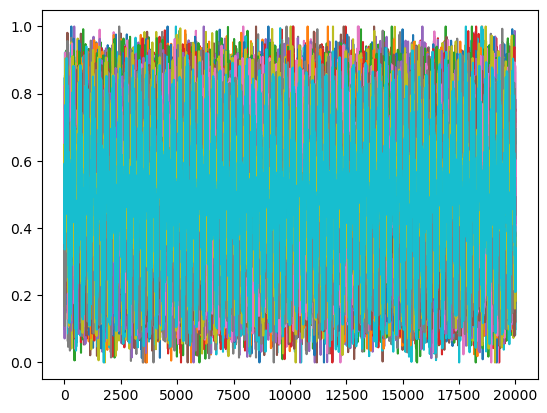

generating signature with window 10...
generating signature with window 30...
generating signature with window 60...
matrix generation finish!
generating train/test data samples...
train/test data generation finish!


In [ ]:
import numpy as np
import argparse
import pandas as pd
import os, sys
import math
import scipy
#import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import spatial
import itertools as it
import string
import re
import matplotlib.pyplot as plt

#path = "/content/"

ts_type = "node"
step_max = 5
min_time = 0
max_time = 20000
gap_time = 10
win_size = [10,30,60]
train_start = 250
train_end = 12500
test_start = 12500
test_end = 20000

#link_name_path = path+"data/synthetic_data_link_name.csv"
save_data_path = "data/"

value_colnames = ['total_count','error_count','error_rate']
ts_colname="agg_time_interval"
agg_freq='5min'

scale_n = len(win_size) * len(value_colnames)

matrix_data_path = save_data_path + "matrix_data/"
if not os.path.exists(matrix_data_path):
	os.makedirs(matrix_data_path)


def generate_signature_matrix_node():
	data = np.array(pd.read_csv(raw_data_path, header = None), dtype=np.float64)[:,1:]
	print(data.shape)
	sensor_n = data.shape[0]
	#data  = np.array(pd.read_csv(raw_data_path, header = None))[:,2:-1]

	# min-max normalization
	max_value = np.max(data, axis=1)
	min_value = np.min(data, axis=1)
	data = (np.transpose(data) - min_value)/(max_value - min_value + 1e-6)
	print(data.shape)
	# std normalization
	# data = np.nan_to_num(data)
	# data_mean = np.mean(data, axis = 0)
	# data_std = np.std(data, axis = 0)
	# data = np.transpose(data) - data_mean
	# data = data / (data_std + 1e-5)

	data = np.transpose(data)
	print(data.shape)
	plt.plot(data.T)
	plt.show()

	#multi-scale signature matix generation
	for w in range(len(win_size)):
		matrix_all = []
		win = win_size[w]
		print ("generating signature with window " + str(win) + "...")
		for t in range(min_time, max_time, gap_time):
			#print t
			matrix_t = np.zeros((sensor_n, sensor_n))
			if t >= 10:
				for i in range(sensor_n):
					for j in range(i, sensor_n):
						#if np.var(data[i, t - win:t]) and np.var(data[j, t - win:t]):
						matrix_t[i][j] = np.inner(data[i, t - win:t], data[j, t - win:t])/(win) # rescale by win
						matrix_t[j][i] = matrix_t[i][j]
			matrix_all.append(matrix_t)

			# if t == 70:
			# 	print matrix_all[6][0]

		path_temp = matrix_data_path + "matrix_win_" + str(win)
		#print np.shape(matrix_all[0])

		np.save(path_temp, matrix_all)
		del matrix_all[:]

	print ("matrix generation finish!")



# def link_data_cleaning():
# 	'''
# 	colnames = ['source_node_type','destination_node_type',ts_colname, v0, v1, v2, ...]
# 	'''
# 	raw_data = pd.read_csv(raw_data_path)

# 	raw_data.columns = ['source_node_type','destination_node_type',ts_colname] + value_colnames

# 	# source destination node
# 	link_name = np.array(raw_data.iloc[:,:2])
# 	link_name_concat = np.array([x+"-"+y for x,y in link_name])
# 	unique_link_name = np.unique(link_name)
# 	unique_link_name_concat = np.unique(link_name_concat)
# 	sensor_n = unique_link_name.shape[0]

# 	# std normalization
# 	data = np.nan_to_num(raw_data.iloc[:,3:])
# 	data = np.nan_to_num(data)
# 	data_mean = np.mean(data, axis = 0)
# 	data_std = np.std(data, axis = 0)
# 	data = data - np.array([data_mean for i in range(data.shape[0])])
# 	data = data / (data_std + 1e-5)
# 	raw_data.iloc[:,3:] = data

# 	# join to align and pivot
# 	raw_data['sd_concat'] = link_name_concat
# 	raw_data[ts_colname] = pd.to_datetime(raw_data[ts_colname],infer_datetime_format=True)
# 	secon_smallest_ts = raw_data[[ts_colname]].drop_duplicates().nsmallest(2, ts_colname).iloc[1,0]
# 	date_range = pd.date_range(start=secon_smallest_ts, end=raw_data[ts_colname].max(), freq=agg_freq)
# 	joined_df = pd.DataFrame(date_range, columns=[ts_colname]).merge(raw_data, on=ts_colname, how='left')


# 	for value_col in value_colnames:
# 		pivot_data = joined_df.pivot(index='sd_concat', columns='agg_time_interval', values=value_col)
# 		output_df = pd.DataFrame(unique_link_name_concat, columns=['sd_concat']).merge(pivot_data.reset_index(),
# 							on='sd_concat', how='left')
# 		output_df.to_csv("/home/zhaos/ts_data_csv2/channel_"+value_col+".csv", header=True, index=False)


# def generate_signature_matrix_link():
# 	'''
# 	For a link a->b,
# 	sum(vector(a->b) * vectro(b->c) + vector(a->b) * vectro(b->d) + ...)/count(b->c,d,...) +
# 	sum(vector(a->b) * vectro(z->a) + vector(a->b) * vectro(y->a) + ...)/count(z,y,...->a)
# 	'''
# 	for value_col in value_colnames:
# 		data = pd.read_csv("/home/zhaos/ts_data_csv2/channel_"+value_col+".csv")
# 		link_name_concat = data.iloc[:,1].values
# 		data = data.iloc[:,1:].values

# 		#multi-scale signature matix generation
# 		for w in range(len(win_size)):
# 			matrix_all = []
# 			win = win_size[w]
# 			print ("generating signature with window " + str(win) + "...")
# 			for t in range(min_time, max_time, gap_time):
# 				#print t
# 				matrix_t = np.zeros((sensor_n, sensor_n))
# 				if t >= 60:
# 					for i in range(sensor_n): # source node
# 						for j in range(i, sensor_n): # destination node
# 							sumprod = 0 # node_i -> node_j
# 							source_node, dest_node = unique_link_name[i], unique_link_name[j]
# 							sd_concat_index = np.where(link_name_concat == source_node+"-"+dest_node)[0]
# 							if len(sd_concat_index) > 0:
# 								link_vector = data[sd_concat_index[0], t - win:t]
# 								for k in range(link_name.shape[0]):
# 									if link_name[k][0] == dest_node:
# 										# sum(vector(a->b) * vectro(b->c) + vector(a->b) * vectro(b->d) + ...)/count(b->c,d,...)
# 										sumpprod += np.inner(link_vector, data[k, t - win:t])/(win)
# 									if link_name[k][1] == source_node:
# 										# sum(vector(a->b) * vectro(z->a) + vector(a->b) * vectro(y->a) + ...)/count(z,y,...->a)
# 										sumpprod += np.inner(data[k, t - win:t], link_vector)/(win)
# 								matrix_t[i][j] = sumpprod
# 				matrix_all.append(matrix_t)

# 				# if t == 70:
# 				# 	print matrix_all[6][0]

# 			path_temp = "/home/zhaos/ts_data_csv2/signature_matrix/matrix_win_" + str(win) + str(value_col)
# 			#print np.shape(matrix_all[0])

# 			np.save(path_temp, matrix_all)
# 			del matrix_all[:]

# 		print ("matrix generation finish!")




def generate_train_test_data():
	#data sample generation
	print ("generating train/test data samples...")
	train_data_path = matrix_data_path + "train_data/"
	if not os.path.exists(train_data_path):
		os.makedirs(train_data_path)
	test_data_path = matrix_data_path + "test_data/"
	if not os.path.exists(test_data_path):
		os.makedirs(test_data_path)

	# Unify all signature matrices with window [10/30/60]
	data_all = []
	for value_col in value_colnames:
		for w in range(len(win_size)):
			path_temp = matrix_data_path + "matrix_win_" + str(win_size[w]) + ".npy"
			data_all.append(np.load(path_temp))

	train_test_time = [[train_start, train_end], [test_start, test_end]]
	for i in range(len(train_test_time)):
		for data_id in range(int(train_test_time[i][0]/gap_time), int(train_test_time[i][1]/gap_time)):
			#print data_id
			step_multi_matrix = []
			for step_id in range(step_max, 0, -1):
				multi_matrix = []
				for k in range(len(value_colnames)):
					for i in range(len(win_size)):
						multi_matrix.append(data_all[k*len(win_size) + i][data_id - step_id])
				step_multi_matrix.append(multi_matrix)

			# Discriminate train and test data:
			if data_id >= (train_start/gap_time + win_size[-1]/gap_time + step_max) and data_id < (train_end/gap_time): # remove start points with invalid value
				path_temp = os.path.join(train_data_path, 'train_data_' + str(data_id))
				np.save(path_temp, step_multi_matrix)
			elif data_id >= (test_start/gap_time) and data_id < (test_end/gap_time):
				path_temp = os.path.join(test_data_path, 'test_data_' + str(data_id))
				np.save(path_temp, step_multi_matrix)

			#print np.shape(step_multi_matrix)

			del step_multi_matrix[:]

	print ("train/test data generation finish!")


if __name__ == '__main__':
	'''need one more dimension to manage mulitple "features" for each node or link in each time point,
	this multiple features can be simply added as extra channels
	'''

	if ts_type == "node":
		generate_signature_matrix_node()
	elif ts_type == "link":
		generate_signature_matrix_link()

	generate_train_test_data()


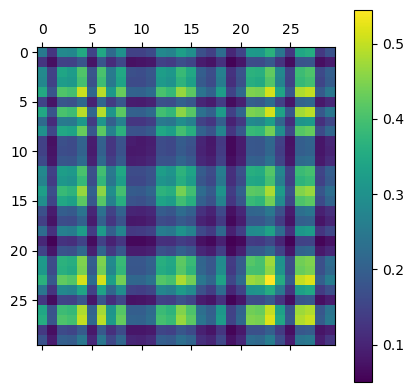

In [ ]:
m = np.load("./data/matrix_data/matrix_win_10.npy")
plt.matshow(m[-1])
plt.colorbar()
plt.show()

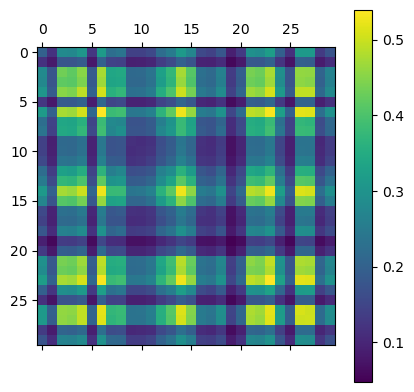

In [ ]:
n = np.load("./data/matrix_data/matrix_win_30.npy")
plt.matshow(n[-1])
plt.colorbar()
plt.show()

In [ ]:
t = np.load("./data/matrix_data/train_data/train_data_50.npy")
print(t.shape)

(5, 9, 30, 30)


#MSCRED

In [ ]:
import numpy as np
import tensorflow as tf
import argparse
import pandas as pd
import os, sys
import timeit
import math
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"

def mscred(batch_size=32, sensor_n=10, win_size=[10,30,60], step_max=5, learning_rate=0.0002,
           training_iters=100, train_start_id=75, train_end_id=350, test_start_id=350,
           test_end_id=600, save_model_step=1, model_path="./mscred_output/",
           raw_data_path="./input_data/synth_train.csv",
           matrix_data_path="./data/matrix_data/", train_test_label=1):

    tf.reset_default_graph() # this is in case i run this block multiple times
    train_data_path = matrix_data_path + "train_data/"
    test_data_path = matrix_data_path + "test_data/"
    value_colnames = ['total_count','error_count','error_rate']
    scale_n = len(win_size) * len(value_colnames)
    sensor_n = np.array(pd.read_csv(raw_data_path, header = None), dtype=np.float64).shape[0]
    print("sensor number: "+str(sensor_n))
    # set GPU
    GPU_id = 0
    os.environ['CUDA_VISIBLE_DEVICES'] = str(GPU_id)

    # 4d data
    data_input = tf.placeholder(tf.float32, [step_max, sensor_n, sensor_n, scale_n])

    # parameters: adding bias weight get similar performance
    conv1_W = tf.Variable(tf.zeros([3, 3, scale_n, 32]), name = "conv1_W")
    conv1_W = tf.get_variable("conv1_W", shape = [3, 3, scale_n, 32], initializer=tf.contrib.layers.xavier_initializer())
    conv2_W = tf.Variable(tf.zeros([3, 3, 32, 64]), name = "conv2_W")
    conv2_W = tf.get_variable("conv2_W", shape = [3, 3, 32, 64], initializer=tf.contrib.layers.xavier_initializer())
    conv3_W = tf.Variable(tf.zeros([2, 2, 64, 128]), name = "conv3_W")
    conv3_W = tf.get_variable("conv3_W", shape = [2, 2, 64, 128], initializer=tf.contrib.layers.xavier_initializer())
    conv4_W = tf.Variable(tf.zeros([2, 2, 128, 256]), name = "conv4_W")
    conv4_W = tf.get_variable("conv4_W", shape = [2, 2, 128, 256], initializer=tf.contrib.layers.xavier_initializer())
    # conv5_W = tf.Variable(tf.zeros([2, 2, 256, 256]), name = "conv5_W")
    # conv5_W = tf.get_variable("conv5_W", shape = [2, 2, 256, 256], initializer=tf.contrib.layers.xavier_initializer())

    # this version computes attention weight based on inner-product between feature representation of last step and other steps
    # thus no attenion parameter
    # atten_2_W = tf.Variable(tf.random_normal([64, 32]))
    # atten_3_W = tf.Variable(tf.random_normal([128, 64]))
    # atten_4_W = tf.Variable(tf.random_normal([256, 128]))
    # atten_5_W = tf.Variable(tf.random_normal([256, 128]))

    # deconv5_W = tf.Variable(tf.zeros([2, 2, 256, 256]), name = "deconv5_W")
    # deconv5_W = tf.get_variable("deconv5_W", shape = [2, 2, 256, 256], initializer=tf.contrib.layers.xavier_initializer())
    deconv4_W = tf.Variable(tf.zeros([2, 2, 128, 256]), name = "deconv4_W")
    deconv4_W = tf.get_variable("deconv4_W", shape = [2, 2, 128, 256], initializer=tf.contrib.layers.xavier_initializer())
    deconv3_W = tf.Variable(tf.zeros([2, 2, 64, 256]), name = "deconv3_W")
    deconv3_W = tf.get_variable("deconv3_W", shape = [2, 2, 64, 256], initializer=tf.contrib.layers.xavier_initializer())
    deconv2_W = tf.Variable(tf.zeros([3, 3, 32, 128]), name = "deconv2_W")
    deconv2_W = tf.get_variable("deconv2_W", shape = [3, 3, 32, 128], initializer=tf.contrib.layers.xavier_initializer())
    deconv1_W = tf.Variable(tf.zeros([3, 3, scale_n, 64]), name = "deconv1_W")
    deconv1_W = tf.get_variable("deconv1_W", shape = [3, 3, scale_n, 64], initializer=tf.contrib.layers.xavier_initializer())


    def cnn_encoder(input_matrix):
        conv1 = tf.nn.conv2d(
            input = input_matrix,
            filter = conv1_W,
            strides=(1, 1, 1, 1),
            padding = "SAME")
        conv1 = tf.nn.selu(conv1)

        conv2 = tf.nn.conv2d(
        input = conv1,
        filter = conv2_W,
        strides=(1, 2, 2, 1),
        padding = "SAME")
        conv2 = tf.nn.selu(conv2)

        conv3 = tf.nn.conv2d(
        input = conv2,
        filter = conv3_W,
        strides=(1, 2, 2, 1),
        padding = "SAME")
        conv3 = tf.nn.selu(conv3)

        conv4 = tf.nn.conv2d(
        input = conv3,
        filter = conv4_W,
        strides=(1, 2, 2, 1),
        padding = "SAME")
        conv4 = tf.nn.selu(conv4)

        # conv5 = tf.nn.conv2d(
        #   input = conv4,
        #   filter = conv5_W,
        #   strides=(1, 2, 2, 1),
        #   padding = "SAME")
        # conv5 = tf.nn.selu(conv5)

        #print conv5.get_shape()

        return  conv1, conv2, conv3, conv4


    def conv1_lstm(conv1_out):
        convlstm_layer = tf.contrib.rnn.ConvLSTMCell(
                    conv_ndims = 2,
                    input_shape = [sensor_n, sensor_n, 32],
                    output_channels = 32,
                    kernel_shape = [2, 2],
                    use_bias = True,
                    skip_connection = False,
                    forget_bias = 1.0,
                    initializers = None,
                    name="conv1_lstm_cell")

        outputs, state = tf.nn.dynamic_rnn(convlstm_layer, conv1_out, time_major = False, dtype = conv1_out.dtype)

        # attention based on transformation of feature representation of last step and other steps
        # outputs_mean = tf.reduce_mean(tf.reduce_mean(outputs[0], axis = 1), axis = 1)
        # outputs_mean_W = tf.tanh(tf.matmul(outputs_mean, atten_2_W))
        # outputs_mean_W = tf.matmul(outputs_mean_W, tf.reshape(outputs_mean_W[-1],[32, 1]))/5.0
        # #outputs_mean_W = tf.matmul(outputs_mean_W, atten_2_V)/5.0
        # attention_w = tf.transpose(tf.nn.softmax(outputs_mean_W, dim=0))

        # attention based on inner-product between feature representation of last step and other steps
        attention_w = []
        for k in range(step_max):
            attention_w.append(tf.reduce_sum(tf.multiply(outputs[0][k], outputs[0][-1]))/step_max)
        attention_w = tf.reshape(tf.nn.softmax(tf.stack(attention_w)), [1, step_max])

        outputs = tf.reshape(outputs[0], [step_max, -1])
        outputs = tf.matmul(attention_w, outputs)
        outputs = tf.reshape(outputs, [1, sensor_n, sensor_n, 32])

        return outputs, state[0], attention_w


    def conv2_lstm(conv2_out):
        convlstm_layer = tf.contrib.rnn.ConvLSTMCell(
                    conv_ndims = 2,
                    input_shape = [int(math.ceil(float(sensor_n)/2)), int(math.ceil(float(sensor_n)/2)), 64],
                    output_channels = 64,
                    kernel_shape = [2, 2],
                    use_bias = True,
                    skip_connection = False,
                    forget_bias = 1.0,
                    initializers = None,
                    name="conv2_lstm_cell")

        outputs, state = tf.nn.dynamic_rnn(convlstm_layer, conv2_out, time_major = False, dtype = conv2_out.dtype)

        # attention based on transformation of feature representation of last step and other steps
        # outputs_mean = tf.reduce_mean(tf.reduce_mean(outputs[0], axis = 1), axis = 1)
        # outputs_mean_W = tf.tanh(tf.matmul(outputs_mean, atten_2_W))
        # outputs_mean_W = tf.matmul(outputs_mean_W, tf.reshape(outputs_mean_W[-1],[32, 1]))/5.0
        # #outputs_mean_W = tf.matmul(outputs_mean_W, atten_2_V)/5.0
        # attention_w = tf.transpose(tf.nn.softmax(outputs_mean_W, dim=0))

        # attention based on inner-product between feature representation of last step and other steps
        attention_w = []
        for k in range(step_max):
            attention_w.append(tf.reduce_sum(tf.multiply(outputs[0][k], outputs[0][-1]))/step_max)
        attention_w = tf.reshape(tf.nn.softmax(tf.stack(attention_w)), [1, step_max])

        outputs = tf.reshape(outputs[0], [step_max, -1])
        outputs = tf.matmul(attention_w, outputs)
        outputs = tf.reshape(outputs, [1, int(math.ceil(float(sensor_n)/2)), int(math.ceil(float(sensor_n)/2)), 64])

        return outputs, state[0], attention_w


    def conv3_lstm(conv3_out):
        convlstm_layer = tf.contrib.rnn.ConvLSTMCell(
                    conv_ndims = 2,
                    input_shape = [int(math.ceil(float(sensor_n)/4)), int(math.ceil(float(sensor_n)/4)), 128],
                    output_channels = 128,
                    kernel_shape = [2, 2],
                    use_bias = True,
                    skip_connection = False,
                    forget_bias = 1.0,
                    initializers = None,
                    name="conv3_lstm_cell")

        outputs, state = tf.nn.dynamic_rnn(convlstm_layer, conv3_out, time_major = False, dtype = conv3_out.dtype)

        # outputs_mean = tf.reduce_mean(tf.reduce_mean(outputs[0], axis = 1), axis = 1)
        # outputs_mean_W = tf.tanh(tf.matmul(outputs_mean, atten_3_W))
        # outputs_mean_W = tf.matmul(outputs_mean_W, tf.reshape(outputs_mean_W[-1],[64, 1]))/5.0
        # #outputs_mean_W = tf.matmul(outputs_mean_W, atten_3_V)/5.0
        # attention_w = tf.transpose(tf.nn.softmax(outputs_mean_W, dim=0))

        attention_w = []
        for k in range(step_max):
            attention_w.append(tf.reduce_sum(tf.multiply(outputs[0][k], outputs[0][-1]))/step_max)
        attention_w = tf.reshape(tf.nn.softmax(tf.stack(attention_w)), [1, step_max])

        outputs = tf.reshape(outputs[0], [step_max, -1])
        outputs = tf.matmul(attention_w, outputs)
        outputs = tf.reshape(outputs, [1, int(math.ceil(float(sensor_n)/4)), int(math.ceil(float(sensor_n)/4)), 128])

        return outputs, state[0], attention_w


    def conv4_lstm(conv4_out):
        convlstm_layer = tf.contrib.rnn.ConvLSTMCell(
                    conv_ndims = 2,
                    input_shape = [int(math.ceil(float(sensor_n)/8)), int(math.ceil(float(sensor_n)/8)), 256],
                    output_channels = 256,
                    kernel_shape = [2, 2],
                    use_bias = True,
                    skip_connection = False,
                    forget_bias = 1.0,
                    initializers = None,
                    name="conv4_lstm_cell")

        #initial_state = convlstm_layer.zero_state(batch_size, dtype = tf.float32)
        outputs, state = tf.nn.dynamic_rnn(convlstm_layer, conv4_out, time_major = False, dtype = conv4_out.dtype)

        # outputs_mean = tf.reduce_mean(tf.reduce_mean(outputs[0], axis = 1), axis = 1)
        # outputs_mean_W = tf.tanh(tf.matmul(outputs_mean, atten_4_W))
        # outputs_mean_W = tf.matmul(outputs_mean_W, tf.reshape(outputs_mean_W[-1],[128, 1]))/5.0
        # #outputs_mean_W = tf.matmul(outputs_mean_W, atten_4_V)/5.0
        # attention_w = tf.transpose(tf.nn.softmax(outputs_mean_W, dim=0))

        attention_w = []
        for k in range(step_max):
            attention_w.append(tf.reduce_sum(tf.multiply(outputs[0][k], outputs[0][-1]))/step_max)
        attention_w = tf.reshape(tf.nn.softmax(tf.stack(attention_w)), [1, step_max])

        outputs = tf.reshape(outputs[0], [step_max, -1])
        outputs = tf.matmul(attention_w, outputs)
        outputs = tf.reshape(outputs, [1, int(math.ceil(float(sensor_n)/8)), int(math.ceil(float(sensor_n)/8)), 256])

        return outputs, state[0], attention_w


    def cnn_decoder(conv1_lstm_out, conv2_lstm_out, conv3_lstm_out, conv4_lstm_out):
        conv1_lstm_out = tf.reshape(conv1_lstm_out, [1, sensor_n, sensor_n, 32])
        conv2_lstm_out = tf.reshape(conv2_lstm_out, [1, int(math.ceil(float(sensor_n)/2)), int(math.ceil(float(sensor_n)/2)), 64])
        conv3_lstm_out = tf.reshape(conv3_lstm_out, [1, int(math.ceil(float(sensor_n)/4)), int(math.ceil(float(sensor_n)/4)), 128])
        conv4_lstm_out = tf.reshape(conv4_lstm_out, [1, int(math.ceil(float(sensor_n)/8)), int(math.ceil(float(sensor_n)/8)), 256])
        #conv5_lstm_out = tf.reshape(conv5_lstm_out, [1, int(math.ceil(float(sensor_n)/16)), int(math.ceil(float(sensor_n)/16)), 256])

        # deconv5 = tf.nn.conv2d_transpose(
        #   value = conv5_lstm_out,
        #   filter = deconv5_W,
        #   output_shape = [1, int(math.ceil(float(sensor_n)/8)), int(math.ceil(float(sensor_n)/8)), 256],
        #   strides = (1, 2, 2, 1),
        #   padding = "SAME")
        # deconv5 = tf.nn.selu(deconv5)
        # deconv5_concat = tf.concat([deconv5, conv4_lstm_out], axis = 3)

        deconv4 = tf.nn.conv2d_transpose(
        value = conv4_lstm_out,
        filter = deconv4_W,
        output_shape = [1, int(math.ceil(float(sensor_n)/4)), int(math.ceil(float(sensor_n)/4)), 128],
        strides = (1, 2, 2, 1),
        padding = "SAME")
        deconv4 = tf.nn.selu(deconv4)
        deconv4_concat = tf.concat([deconv4, conv3_lstm_out], axis = 3)

        deconv3 = tf.nn.conv2d_transpose(
        value = deconv4_concat,
        filter = deconv3_W,
        output_shape = [1, int(math.ceil(float(sensor_n)/2)), int(math.ceil(float(sensor_n)/2)), 64],
        strides = (1, 2, 2, 1),
        padding = "SAME")
        deconv3 = tf.nn.selu(deconv3)
        deconv3_concat = tf.concat([deconv3, conv2_lstm_out], axis = 3)

        deconv2 = tf.nn.conv2d_transpose(
        value = deconv3_concat,
        filter = deconv2_W,
        output_shape = [1, sensor_n, sensor_n, 32],
        strides = (1, 2, 2, 1),
        padding = "SAME")
        deconv2 = tf.nn.selu(deconv2)

        deconv2_concat = tf.concat([deconv2, conv1_lstm_out], axis = 3)

        deconv1 = tf.nn.conv2d_transpose(
        value = deconv2_concat,
        filter = deconv1_W,
        output_shape = [1, sensor_n, sensor_n, scale_n],
        strides = (1, 1, 1, 1),
        padding = "SAME")
        deconv1 = tf.nn.selu(deconv1)
        deconv1 = tf.reshape(deconv1, [1, sensor_n, sensor_n, scale_n])
        return deconv1


    conv1_out, conv2_out, conv3_out, conv4_out = cnn_encoder(data_input)
    conv1_out = tf.reshape(conv1_out, [-1, step_max, sensor_n, sensor_n, 32])
    conv2_out = tf.reshape(conv2_out, [-1, step_max, int(math.ceil(float(sensor_n)/2)), int(math.ceil(float(sensor_n)/2)), 64])
    conv3_out = tf.reshape(conv3_out, [-1, step_max, int(math.ceil(float(sensor_n)/4)), int(math.ceil(float(sensor_n)/4)), 128])
    conv4_out = tf.reshape(conv4_out, [-1, step_max, int(math.ceil(float(sensor_n)/8)), int(math.ceil(float(sensor_n)/8)), 256])

    conv1_lstm_attention_out, conv1_lstm_last_out, atten_weight_1 = conv1_lstm(conv1_out)
    conv2_lstm_attention_out, conv2_lstm_last_out, atten_weight_2 = conv2_lstm(conv2_out)
    conv3_lstm_attention_out, conv3_lstm_last_out, atten_weight_3 = conv3_lstm(conv3_out)
    conv4_lstm_attention_out, conv4_lstm_last_out, atten_weight_4 = conv4_lstm(conv4_out)

    deconv_out = cnn_decoder(conv1_lstm_attention_out, conv2_lstm_attention_out, conv3_lstm_attention_out, conv4_lstm_attention_out)

    # loss function: reconstruction error of last step matrix
    loss = tf.reduce_mean(tf.square(data_input[-1] - deconv_out))
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

    init = tf.global_variables_initializer()
    saver = tf.train.Saver(max_to_keep = 10)

    starting_iter = 0
    if train_test_label == 1: # model training
        with tf.Session(config=tf.ConfigProto(inter_op_parallelism_threads=80, intra_op_parallelism_threads=80)) as sess:
            if starting_iter == 0:
                sess.run(init)
            else:
                saver.restore(sess, model_path + str(starting_iter-1) + ".ckpt")
            start = timeit.default_timer()
            for idx in range(starting_iter, starting_iter+training_iters):
                print ("training iteration " + str(idx) + "...")
                for train_id in range(train_start_id, train_end_id):
                    matrix_data_path = train_data_path + "train_data_" + str(train_id) + ".npy"
                    matrix_gt = np.load(matrix_data_path)
                    matrix_gt = np.transpose(matrix_gt, (0, 2, 3, 1))

                    #print(matrix_gt.shape)

                    feed_dict = {data_input: np.asarray(matrix_gt)}
                    a, loss_value = sess.run([optimizer, loss], feed_dict)

                    # if train_id % 50 == 0:
                    # 	save_path = saver.save(sess, model_path + str(idx * 15 + train_id/50) + ".ckpt")

                if idx % save_model_step == 0:
                    if not os.path.exists(model_path):
                        os.makedirs(model_path)
                    save_path = saver.save(sess, model_path + str(idx) + ".ckpt")
                    print ("mse of last train data: " + str(loss_value))

            stop = timeit.default_timer()

            print(str(training_iters) + " iterations training finish, use time: " + str(stop - start))

    if train_test_label == 0: # model test
        learning_curve = open("./learning_curve.csv", "w")

        with tf.Session(config=tf.ConfigProto(inter_op_parallelism_threads=20, intra_op_parallelism_threads=20)) as sess:
            restore_idx = 0 # setting restore_idx of learned model
            saver.restore(sess, model_path + str(restore_idx) + ".ckpt")

            reconstructed_data_path = matrix_data_path + "reconstructed_data/"
            if not os.path.exists(reconstructed_data_path):
                os.makedirs(reconstructed_data_path)

            print ("model test: generate recontrucuted matrices"+ "...")
            loss_value_ave = 0
            for test_id in range(test_start_id, test_end_id):
                matrix_data_path = test_data_path + 'test_data_' + str(test_id) + ".npy"
                matrix_gt = np.load(matrix_data_path)
                matrix_gt = np.transpose(matrix_gt, (0, 2, 3, 1))

                feed_dict = {data_input: np.asarray(matrix_gt)}
                reconstructed_matrix = sess.run([deconv_out], feed_dict)

                loss_value = sess.run([loss], feed_dict)
                loss_value_ave += loss_value[0]
                #print(loss_value)

                path_temp = os.path.join(reconstructed_data_path, 'reconstructed_data_' + str(test_id) + ".npy")
                np.save(path_temp, np.asarray(reconstructed_matrix))

                learning_curve.write("%lf\n"%(loss_value_ave/789))
                #print(loss_value_ave/10000)
                #print(str(i*50) + "\t" + str(loss_value_ave/600))
            print ("reconstructed matrices generation finish.")

        learning_curve.close()


In [ ]:
mscred(training_iters=10)


sensor number: 30


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





training iteration 0...
mse of last train data: 0.0014444198
training iteration 1...
mse of last train data: 0.00076395343
training iteration 2...
mse of last train data: 0.00063747604
training iteration 3...
mse of last train data: 0.00023544344
training iteration 4...
mse of last train data: 0.00029780465
training iteration 5...
mse of last train data: 0.0004137962
training iteration 6...
ms

In [ ]:
mscred(train_test_label=0, test_start_id=1250, test_end_id=1999)

sensor number: 30
INFO:tensorflow:Restoring parameters from ./mscred_output/0.ckpt
model test: generate recontrucuted matrices...
reconstructed matrices generation finish.


#Explore output

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Learning curve

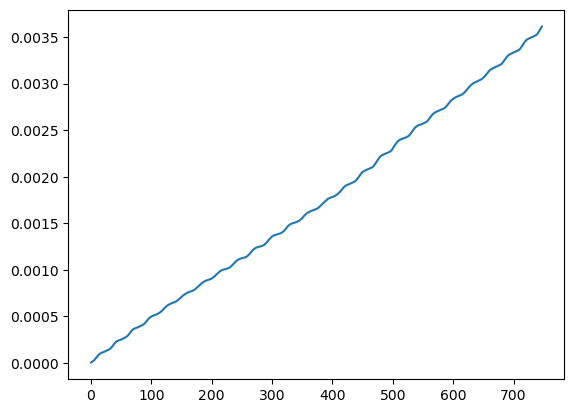

In [ ]:
learning_curve = pd.read_csv('./learning_curve.csv')
plt.plot(learning_curve)
plt.show()

Reconstructed matrices

In [ ]:
m10 = np.load("./data/matrix_data/matrix_win_10.npy")
m30 = np.load("./data/matrix_data/matrix_win_30.npy")
m60 = np.load("./data/matrix_data/matrix_win_60.npy")

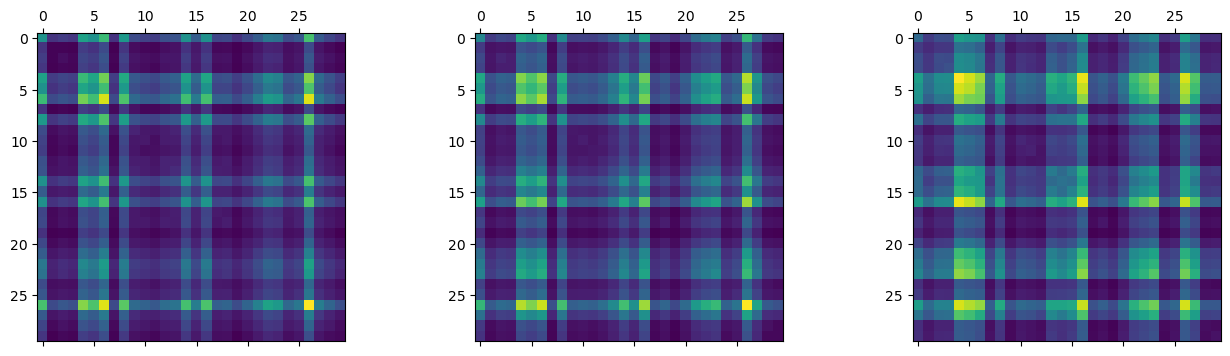

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax[0].matshow(m10[1000,:,:])
ax[1].matshow(m30[1000,:,:])
ax[2].matshow(m60[1000,:,:])

In [ ]:
import matplotlib.pyplot as plt
test = np.load("./data/matrix_data/test_data/test_data_1998.npy")
r = np.load("./data/matrix_data/reconstructed_data/reconstructed_data_1998.npy")
r = np.transpose(r[0], [0, 3, 1, 2])
r.shape
print(test.shape)
print(r.shape)

(5, 9, 30, 30)
(1, 9, 30, 30)


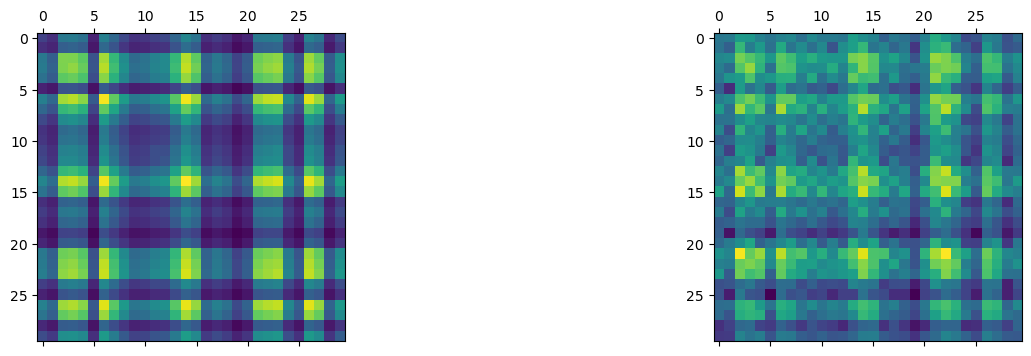

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
ax[0].matshow(test[4,0])
ax[1].matshow(r[0,0])

Residual matrix

In [ ]:
select_matrix_error = np.square(np.subtract(test[4,0], r[0,0]))
num_broken = len(select_matrix_error[select_matrix_error > 0.005])

In [ ]:
num_broken

580

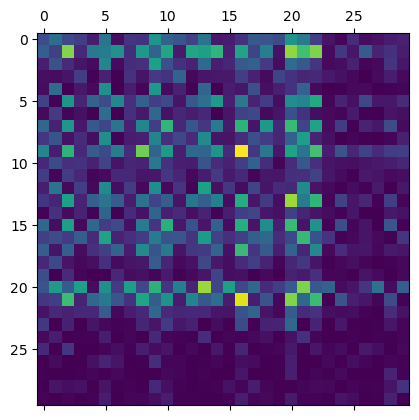

In [ ]:
plt.matshow(select_matrix_error)

#Evaluate

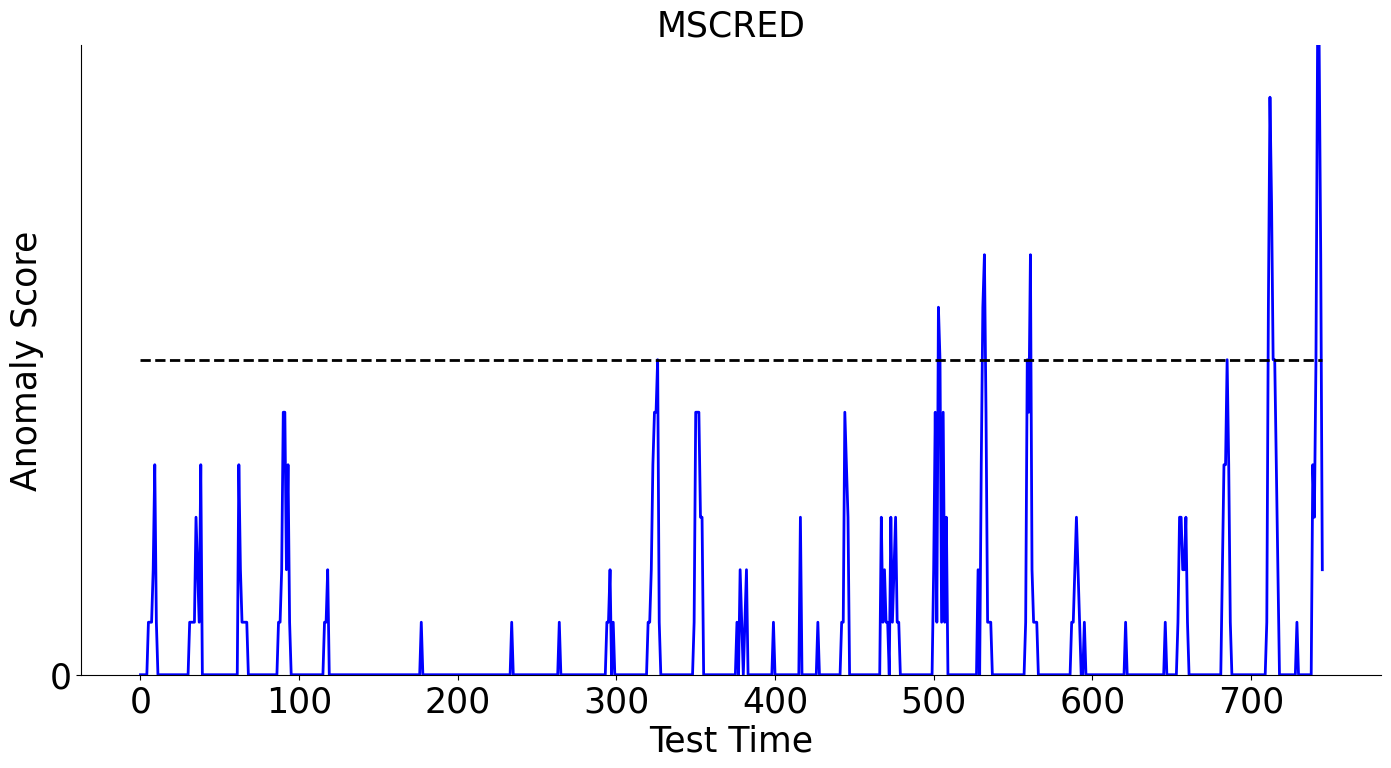

In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import os

thred_b = 0.1
alpha = 6
gap_time = 1
valid_start = 1250
valid_end = 1252
test_start = 1253
test_end = 1999

valid_anomaly_score = np.zeros((valid_end - valid_start , 1))
test_anomaly_score = np.zeros((test_end - test_start, 1))

matrix_data_path = "./data/matrix_data/"
test_data_path = matrix_data_path + "test_data/"
reconstructed_data_path = matrix_data_path + "reconstructed_data/"
#reconstructed_data_path = matrix_data_path + "matrix_pred_data/"

for i in range(valid_start, test_end):
	path_temp_1 = os.path.join(test_data_path, "test_data_" + str(i) + '.npy')
	gt_matrix_temp = np.load(path_temp_1)

	path_temp_2 = os.path.join(reconstructed_data_path, "reconstructed_data_" + str(i) + '.npy')
	#path_temp_2 = os.path.join(reconstructed_data_path, "pcc_matrix_full_test_" + str(i) + '_pred_output.npy')
	reconstructed_matrix_temp = np.load(path_temp_2)
	reconstructed_matrix_temp = np.transpose(reconstructed_matrix_temp[0], [0, 3, 1, 2])

	#first (short) duration scale for evaluation
	select_gt_matrix = np.array(gt_matrix_temp)[4][0] #get last step matrix

	select_reconstructed_matrix = np.array(reconstructed_matrix_temp)[0][0]

	# if i == 2000:
	# 	print select_reconstructed_matrix[0][0]

	#compute number of broken element in residual matrix
	select_matrix_error = np.square(np.subtract(select_gt_matrix, select_reconstructed_matrix))
	num_broken = len(select_matrix_error[select_matrix_error > thred_b])

	#print num_broken
	if i < valid_end:
		valid_anomaly_score[i - valid_start] = num_broken
	else:
		test_anomaly_score[i - test_start] = num_broken

valid_anomaly_max = np.max(valid_anomaly_score.ravel())
test_anomaly_score = test_anomaly_score.ravel()

# plot anomaly score curve and identification result
anomaly_pos = np.zeros(5)
root_cause_gt = np.zeros((5, 3))
anomaly_span = [10, 30, 90]

fig, axes = plt.subplots(figsize=(20, 10))
#plt.plot(test_anomaly_score, 'black', linewidth = 2)
test_num = test_end - test_start
plt.xticks(fontsize = 25)
plt.ylim((0, np.max(test_anomaly_score)))
plt.yticks(np.arange(0, np.max(test_anomaly_score), 20), fontsize = 25)
plt.plot(test_anomaly_score, 'b', linewidth = 2)
threshold = np.full((test_num), valid_anomaly_max * alpha)
axes.plot(threshold, color = 'black', linestyle = '--',linewidth = 2)
#labels = [' ', '0e3', '2e3', '4e3', '6e3', '8e3', '10e3']
#axes.set_xticklabels(labels, rotation = 25, fontsize = 20)
plt.xlabel('Test Time', fontsize = 25)
plt.ylabel('Anomaly Score', fontsize = 25)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')
fig.subplots_adjust(bottom=0.25)
fig.subplots_adjust(left=0.25)
plt.title("MSCRED", size = 25)

plt.show()

#28/06/23

Ho esplorato i dati generati da MSCRED, giocando anche un po' con gli iper-parametri. In effetti, anche dopo solo 10 iterazioni di training, MSCRED trova 5 anomalie in punti che sembrano coerenti con le anomalie iniettate nel dataset sintetico. Non ho ancora capito come posso ricavare la posizione esatta delle anomalie dato il plot sopra per confrontarle con quelle originali.